In [1]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [3]:
image_path = "yoni_eyal.jpg"

In [4]:
img = cv2.imread(image_path)

In [5]:
#pyplot expects RGB
def mymshow(image):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)

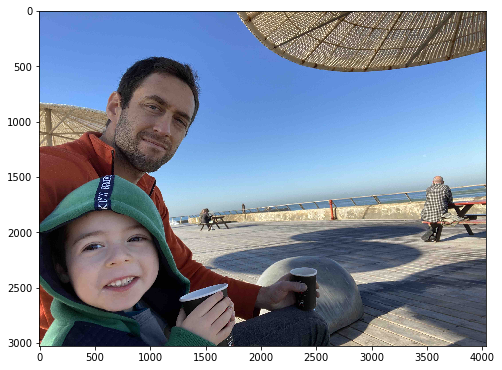

In [6]:
mymshow(img)

In [35]:
#  apply median blur t o remove digital noise
blurredSrc = cv2.medianBlur(img, 17)
graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)

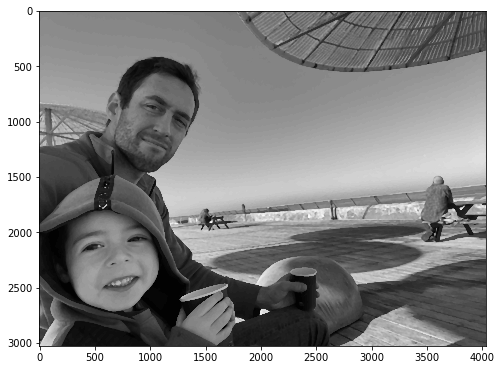

In [36]:
mymshow(graySrc)

In [37]:
# laplacian for edge finding
cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, ksize = 5)

array([[  0,   0,   0, ..., 168, 252, 168],
       [  0,   0,   0, ..., 150, 216, 124],
       [  0,   0,   0, ..., 140, 198, 108],
       ...,
       [ 64,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

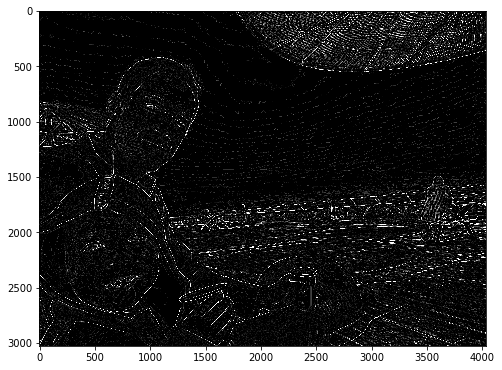

In [38]:
mymshow(graySrc)

In [39]:
#normalize edges and put on origianl image
normalizedInverseAlpha = (1.0 / 255) * (255 - graySrc)
channels = cv2.split(img)
for channel in channels:
    channel[:] = channel * normalizedInverseAlpha
cv2.merge(channels, img);

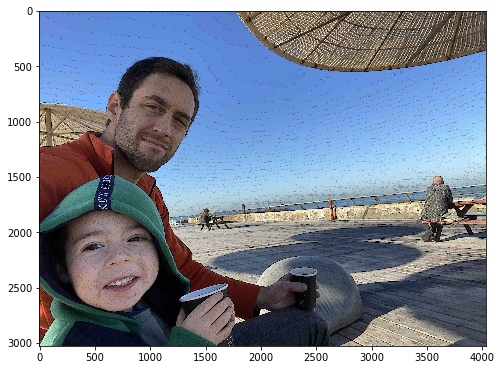

In [34]:
mymshow(img)

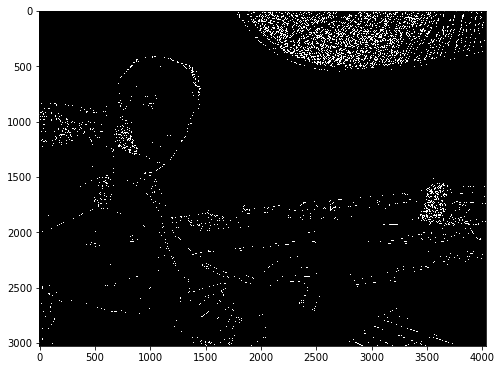

In [51]:
# canny
img = cv2.imread(image_path)
canny = cv2.Canny(img, 200, 100)
mymshow(canny)